# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict diabetes among the Pima Indian population. 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
    <li>Gradient Boosting Machines</li>
</details><br>
Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 
<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 33%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="https://cdn.images.express.co.uk/img/dynamic/11/590x/Diabetes-symptoms-870995.jpg" style="float: left; width: 35%; margin-bottom: 0.5em;">
<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/sankey-diagram-1.png" style="float: left; width: 28%; margin-left: 1%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're a program officer for the Indian Health Service (IHS). Your state has recently obtained a federal grant aimed at improving health equity. This includes improving care among traditionally disadvantaged groups. From working within the IHS for several years now, you know that American Indians are more likely to suffer from metabolic disease, particularly diabetes. With this grant, you now have the chance to leverage new technologies in analytics and machine learning to improve care among this group. What role can these technologies play in improving diabetes care among this vulnerable population.

Lets find out. 

### Clinical Background: Diabetes

Diabetes describes a group of metabolic disorders that is characterized by abnormally high blood glucose (blood sugar). Insulin is a critical hormone that allows the body to take up glucose and use it as energy. Diabetes occurs when your body does not produce enough insulin or cannot use the insulin well. When this happens, glucose stays in your blood instead of being used as energy. Over time, this glucose in your blood can lead to various health problem. These can include serious complications such as blindness, limb amputation, and stroke. 

<img src="http://cdn.shopify.com/s/files/1/0582/0445/files/blood-sugar-levels-and-paleo_diagram_of_excessive_blood_glucose.jpg?14686865159083212781" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Diabetes is common among individuals over 45 years old, have a family history of diabetes, and are overweight. Poor lifestyle choice such as not exercising or smoking can also increase the risk. Diabetes is one of the most common conditions in the United States with over 30 million people suffering from diabetes. The total estimated cost of diabetes to the health care system is estimated to be $327 Billion. Current treatment includes insulin and medication to control blood glucose levels. Lifestyle modifications before the onset of diabetes can make a huge difference in whether a person develop diabetes. Any algorithm which could reliably predict diabetes could give providers critical information to intervene before a patient has diabetes.

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [ ]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!
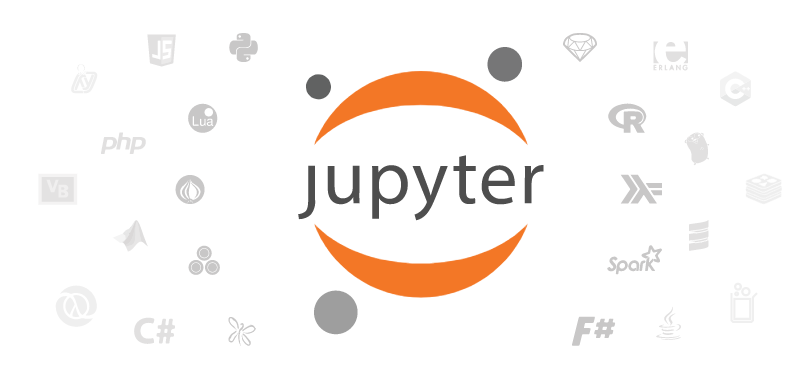


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using a deidentified set of patient data made available by the National Institute of Diabetes and Digestive and Kidney Diseases. It's important to note that several constraints were made in order to acquire the dataset. All patients are female, at least 21 years old, and of Pima Indian heritage. The variables selected were chosen due to being significant risk factors for diabetes among Pimas or other population groups. The data is hosted on [kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database), a data science community website. 

**Acknowledgements** <br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Data File

<p style="text-align: center;">diabetes.csv</p>

***
This file contains our dataset. There are a little over 768 patients with 9 variables. The data includes mostly clinical data. 

The dataset will already be downloaded for the case. The The original data can be acceded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv). 

### Consulting the Data Dictionary

There are several variables or labels which you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is consulting the data dictionary or documentation. These are table or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!


Unfortunately, no documentation is provided on the original data page. However, the original study which the data come from is available [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf). The relevant information has been added below for your convenience. 

<center>

| *Variable*               | *Definition*                                                         |
| ------------------------ | -------------------------------------------------------------------- |
| Pregnancies              | Number of times pregnant                                             |
| Glucose                  | Plasma glucose concentration following a 2 hour oral glucose tolerance test                                             |
| BloodPressure            | Diastolic Blood Pressure (mm Hg)                                     | 
| SkinThickness            | Triceps Skin Fold Thickness (mm)                                     |
| Insulin                  | 2-Hour Serum Insulin Levels                                          |
| BMI                      | Weight in kg / (Heigh in m)^2                                        |
| DiabetesPedigreeFunction | Measure of expected genetic influence on the subject's diabetes risk |
| Age                      | Age (Years)                                                          |
| Outcome                  | Diabetes as defined as plasma glucose concentration > 200 mg/dl two hours after ingestion of 75 gram carbohydrate solution |


</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [ ]:
# Calling external libraries for additional functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
from pandas.api.types import CategoricalDtype 
plt.style.use('fivethirtyeight')
# Increase max number of columns displayed in output tables
pd.set_option("display.max_columns",50)

# Make sure your ML results are the same
random.seed(10)

print('Setup complete!')

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that is commonly overlooked within data science projects. This is critical for making our data convenient to interpret and manipulate. In addition, many analytic techniques require properly formatted data. Finally, healthcare datasets may have have data that isn't clinically relevant (ie. raw lab values). Processing can convert these variables into clinically meaningful information. It won't matter how sophisticated our analysis is if we don't properly process our data. A common saying in data science is "Junk in, Junk out". 

## Inspecting Our Data

We'll being by reading in our data so we can clean and use it. 

In [ ]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
print('Data loading, please wait\n')
pima_diabetes = pd.read_csv("data/diabetes.csv",  encoding="UTF-8", sep=",")
print('Data loaded!')

Now let's get an overview of our data

In [ ]:
pima_diabetes.head()

In [ ]:
pima_diabetes.info()

In [ ]:
pima_diabetes.describe()

For the most part all values are classified correctly as numeric or categorical besides the `Outcome` variable.  In addition there seem to be some odd values. There are individuals with a `BMI` of 0 or 67.1, likely implausible values. Other instances of implausible values include a `Glucose` of 0, 17 `Pregnancies`, and `SkinThickness` of 99 mm. We will consider all of these characteristics as we clean our data. 

## Recoding Variables

First lets recode the variable `Outcome`into something meaningful. Based upon the data dictionary, we can see that `1` for any of these fields indicates the patient is classified as having Diabetes. A `0` indicates they are not classified as having diabetes. 

In [ ]:
# Recoding
pima_diabetes.Outcome=pima_diabetes.Outcome.apply(lambda x:'Diabetes' if x == 1 else 'No diabetes')

print('Data Recoded')

Lets confirm our changes

In [ ]:
pima_diabetes.Outcome.head()

## Checking for Missing Values

Lets examine the number of missing values

In [ ]:
print('Number of Missing Data for Each Variable:')
pima_diabetes.isna().sum()

This is very interesting. There are no missing values. If this is true, then this an incredibly clean dataset. However, this is rarely the case. It's more likely that R cannot recognize missing or erroneous values as being missing. 

All of our variables are numeric so it is unlikely there will be categories of erroneously coded data. The more likely option is that there are implausible values. This will increase our number of missing.

### Removing Implausible Values

Earlier we saw several implausible values. These include `Glucose`, `BloodPressure`, `SkinThickness`, `Pregnancies`, `Insulin`, and `BMI`. Lets take a closer look.

In [ ]:
print('Glucose:')
pima_diabetes.Glucose.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

In [ ]:
print('Blood Pressure:')
pima_diabetes.BloodPressure.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

In [ ]:
print('Skin Thickness:')
pima_diabetes.SkinThickness.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

In [ ]:
print('Serum Insulin:')
pima_diabetes.Insulin.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

In [ ]:
print('BMI:')
pima_diabetes.BMI.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

In [ ]:
print('Pregnancies')
pima_diabetes.Pregnancies.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

Based on the percentiles above, we can get a better sense of implausible and plausible values. Based on the results we can make the following judgements:

**Glucose:**
- Glucose is unlikely to go below 50 with the 1st percentile being 57. The 0 glucose measurement is physiologically impossible and likely to be an error or missing

**Blood Pressure:**
- Diastolic blood pressure is unlikely to go below 30 with the 5th percentile being 38.7. Patients at this level are likely to be considered hypotensive or in shock. 0 diastolic blood pressure is physiologically impossible and likely to be an error or missing.

**Skin Thickness:**
-  It biologically unlikely skin thickness would be above 80 mm or below 10 mm. This is confirmed by our percentile data with a huge jump between the 99th and 100th percentile. 

**Serum Insulin:**
-  2 hour serum insulin levels are physiologically unlikely to fall below 10 or above 300. This is confirmed by our percentile results. The jump from 95% to 99th and 100th percentile is enormous. In addition the values o 0 for serum insulin are physiologically impossible and likely errors. 

**BMI:**
- BMI is unlikely to go above the 99th percentile of 50.759. The maximum of 67.1 seems biologically implausible. 
- BMI below the 5th percentile of 21.8 are possible. However, BMI values of 0 are likely mistakes. 

Based on these findings, lets reclassify implausible values as `Na`

In [ ]:
pima_diabetes=pima_diabetes[pima_diabetes.Glucose>=50]
pima_diabetes=pima_diabetes[pima_diabetes.BloodPressure>=30]
pima_diabetes=pima_diabetes[pima_diabetes.SkinThickness>=10]
pima_diabetes=pima_diabetes[pima_diabetes.SkinThickness<=80]
pima_diabetes=pima_diabetes[pima_diabetes.Insulin>=10]
pima_diabetes=pima_diabetes[pima_diabetes.Insulin<=500]
pima_diabetes=pima_diabetes[pima_diabetes.BMI>=10]
pima_diabetes=pima_diabetes[pima_diabetes.BMI<=50]

print('Data Recoded')

## Creating Clinically Relevant Variables

Our data includes the raw lab value for BMI. This is not a very useful measure by itself. Lets convert it into something more clinically meaningful. 

- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

### BMI

BMI stands for Body Mass Index. This a measure of body weight based upon a person's weight and height. This measure is commonly used to classify individuals as being overweight or a health weight. Below is the BMI formula. 

\[\large \frac{weight (kg)}{[height (m)]^{2}}\]

We will create a new variable which reflects the clinical cutoffs for bmi. 

**Knowledge Check:** What are the clinical cut-offs for BMI?

<center>

| *Category*     | *BMI Range*     |
| -------------- | --------------- |
| Underweight    | BMI < 18.5      |
| Healthy Weight | 18.5 ≤ BMI < 25 |
| Overweight     | 25 ≤ BMI < 30   |
| Obese          | 30 ≥ BMI        |

</center>

Let create the new variable 'bmi_interp' based off these cut-offs 

In [ ]:
# Create 'bmi_interp'
pima_diabetes['bmi_interp']=pima_diabetes.BMI.apply(lambda x: 'Underweight' if x<18.5 
                                                   else('Healthy Weight' if (x >=18.5 and x<25)
                                                       else('Overweight' if (x>=25 and x<30) else 'Obese')))


print('\'bmi_interp\' variable created!')

Let's confirm our results

In [ ]:
pima_diabetes[['BMI','bmi_interp']].head()

#### Limitations and Considerations when using BMI

BMI is a simple, inexpensive, and common measure for body fat. However, there are several clinical considerations to keep in mind when using this measure. It's critical to keep in mind BMI is only a surrogate measure since it uses weight instead of actual body fat content in its calculations. Below are three examples of factors that can influence BMI:

- age: older adults usually have more body fat than younger adults for the same BMI
- gender: women tend to have greater amounts of body fat compared to men for the same BMI
- muscle mass: muscular individuals or athletes may have higher BMI due to increased muscle mass

[Source](https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf)

<center>

| *Category*     | *Blood Glucose (mg/dl)*   |
| -------------- | ------------------------- |
| Diabetic       | 200 ≤ Blood Glucose       |
| Prediabetic    | 140 ≤ Blood Glucose < 200 |
| Healthy        |  Blood Glucose < 140      |

</center>

# Exploratory Data Analysis 

Now that we've cleaned our data we can begin exploring our data. Using this, we can see which features are good candidates for building our prediction model. Feature selection  will determine how good or how bad your model is. Bad feature selection can have a hugely negative impact on your model even if you used the most advanced techniques. Understanding the clinical nuances of your data can inform better feature selection

### Why Can't We Just Use All or Most Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

### Getting A Closer Look At Our Data

Lets take a closer look as we begin our exploratory data analysis. 

In [ ]:
pima_diabetes.head()

In [ ]:
pima_diabetes.info()

In [ ]:
pima_diabetes.describe()

In [ ]:
pima_diabetes.bmi_interp.value_counts()

This summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

These summaries will provide a useful reference throughout our exploratory data analysis. 

A chi-square test is a statistical test that tells you whether groups of observations are different. For instance, say you're researching two companies and you divide them either as male or female. The number of males compared to females in the two companies differ but how can you tell that this is not random chance? A chi-squared test can be used to differentiate whether the **observed** number of males and females in your study differs from the **expected** number of males and females. 

> Note: Chi-square tests can only be used for categorical variables. There are separate tests to determine whether numerical numbers differ form one another. These additional tests are beyond the scope of the case. 

## Assessing Numeric Variables

We can see that the most of our predictor variables are numeric with the exception of `bmi_interp`. Lets examine the distribution of these variables. 

In [ ]:
pima_diabetes.Age.median()

In [ ]:
# Create Plot
fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
n, bins, patches=plt.hist(pima_diabetes.Pregnancies,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Number of Pregnancies')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Pregnancies.median(), color='r',linestyle='dashed')
plt.text(3,110,'Dashed Line Represents Median Pregnancies (2)')

plt.subplot(3,2,2)
n, bins, patches=plt.hist(pima_diabetes.Glucose,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Blood Glucose')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Glucose.median(), color='r',linestyle='dashed')
plt.text(125,60,'Dashed Line Represents Median Blood Glucose (118.5)')

plt.subplot(3,2,3)
n, bins, patches=plt.hist(pima_diabetes.BloodPressure,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Blood Pressure (mm Hg)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.BloodPressure.median(), color='r',linestyle='dashed')
plt.text(73,70,'Dashed Line Represents Median Blood Pressure (70)')

plt.subplot(3,2,4)
n, bins, patches=plt.hist(pima_diabetes.SkinThickness,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Skin Thickness (mm)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.SkinThickness.median(), color='r',linestyle='dashed')
plt.text(32,55,'Dashed Line Represents Median Skin Thickness (29)')

plt.subplot(3,2,5)
n, bins, patches=plt.hist(pima_diabetes.DiabetesPedigreeFunction,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Diabetes Pedigree Function')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.DiabetesPedigreeFunction.median(), color='r',linestyle='dashed')
plt.text(0.5,60,'Dashed Line Represents Median \nDiabetes Pedigree Function (0.44)')

plt.subplot(3,2,6)
n, bins, patches=plt.hist(pima_diabetes.Age,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Age (years)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(pima_diabetes.Age.median(), color='r',linestyle='dashed')
plt.text(29,100,'Dashed Line Represents Median Age (27)')

plt.show()

There does not appear to be any extreme values or prominent clusters. Now lets see if theres a relationship between diabetes and our predictors.

In [ ]:
# Create Plot
fig = plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Pregnancies,orient='h')
xlabel=plt.xlabel('Number Pregnancies')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,2)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Glucose,orient='h')
xlabel=plt.xlabel('Blood Glucose')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,3)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.BloodPressure,orient='h')
xlabel=plt.xlabel('Blood Pressure (mm Hg)')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,4)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.SkinThickness,orient='h')
xlabel=plt.xlabel('Skin Thickness (mm)')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,5)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.DiabetesPedigreeFunction,orient='h')
xlabel=plt.xlabel('Diabetes Pedigree Function')
ylabel=plt.ylabel('Diabetes Status')

plt.subplot(3,2,6)
sns.violinplot(y=pima_diabetes.Outcome,x=pima_diabetes.Age,orient='h')
xlabel=plt.xlabel('Age')
ylabel=plt.ylabel('Diabetes Status')

Overall, most variables have difference distribution between 'No Diabetes' and 'Diabetes'. This indicates that these variables can discriminate between our two outcomes and are likely excellent candidate predictor variables

The only exception is `Blood Pressure`. However, we cannot throw out `Blood Pressure`. [Relevant literature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3314178/) has shown a link between hypertension (high blood pressure) and diabetes. For this reasons, we will include `Blood Pressure` in our model. 

### Balancing Feature Selection with Clinical Knowledge

There may be time where your analysis where your data may show a feature does not have an effect or be a statistically significant feature. These always need to be balanced with clinical knowledge. If you know that something is important clinically that should balance incidental statistical findings. Statistical effects and significance can change based on the characteristics of your data. Always use your clinical/domain knowledge to inform the analytic process when possible. 

## Assessing Categorical Variables

We can now examine our final candidate predictor variable `BMI Interpretaion`. 

In [ ]:
def stacked_plot(feature,xlabel):
    binary=pima_diabetes.groupby('Outcome')
    length=len(pima_diabetes[feature].unique())
    layers=[]
    for symbol, group in binary:
        sequence=group[feature].value_counts().index
        temp=[]
        try:
            for i in range(length):
                number=group[feature].value_counts()[i]
                temp.append(number)
        except:
            print('')
        temp=dict(zip(sequence,temp))
        layers.append(temp)
    names=pima_diabetes[feature].unique()
    no_outcome_layer=[0]*len(names)
    outcome_layer=[0]*len(names)
    position=np.arange(len(names))+1
    for i in range(len(names)):
        try:
            no_outcome_layer[i]=layers[0][names[i]]
        except:
            no_outcome_layer[i]=0
        try:
            outcome_layer[i]=layers[1][names[i]]
        except:
            outcome_layer[i]=0
        total=no_outcome_layer[i]+outcome_layer[i]
        no_outcome_layer[i]=no_outcome_layer[i]/total
        outcome_layer[i]=outcome_layer[i]/total
    plt.bar(position,no_outcome_layer, color='blue', edgecolor='white')
    plt.bar(position, outcome_layer, bottom=no_outcome_layer, color='red', edgecolor='white')
    plt.title(xlabel)
    plt.xticks(position, names, fontweight='bold')
    plt.show()

In [ ]:
# Create Plot
stacked_plot('bmi_interp','BMI Status')

We can see that increasing BMI leads to increased proportion of diabetes. We also know this clinically since many of the metabolic risk factors behind obesity/overweight underpin diabetes. All in all this indicates that `BMI Status` is an excellent predictor variable from a data science and clinical perspective. 

## Logistic Regression

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcomes (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

Our primary outcome is whether the individual has diabetes. The logistic regression model will allow us to see how individuals variables affect whether an individual has a stroke **while controlling for other variables in the model**. For instance, we can see whether being older affects having diabetes while controlling for weight, genetics, etc...

Very useful indeed!

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is high- or low-risk. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Lets create out logistic model

In [ ]:
pima_diabetes.loc[pima_diabetes.Outcome=='No diabetes','Outcome']=0
pima_diabetes.loc[pima_diabetes.Outcome=='Diabetes','Outcome']=1

In [ ]:
X=pima_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','bmi_interp','DiabetesPedigreeFunction','Age']]

In [ ]:
X=pd.get_dummies(X)
Y=pima_diabetes.Outcome

In [ ]:
import statsmodels.api as sm
model=sm.GLM(Y,X)
result=model.fit()

In [ ]:
result.summary()

We can see that several of our variables do not have a statistically significant effect. Several of these variables are clinically relevant. For instance, we know that hypertensive and older individuals are at higher risk for diabetes For this reason we will be keeping it in our model. 

While statistical significance is important, it is always more important to consider whether our predictor are clinically relevant for the outcome we will be predicting. Remember to alway consider the clinical significance of a variable and not just the statistical significance!

# Building A Predictive Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What differentiate machine learning for statistical analysis?

For our case, we will be using a model called gradient boosting machines. To understand gradient boosting machines we first must understand what boosting and decision trees are. Boosting is the process of converting a weak learner into a strong learner. Decision trees are charts which help make a decision or prediction. Each branch represents a possible outcome. The end of branches represent an end result or decision.

Decision trees are common in medical settings. For instance, below is an algorithm for evaluating febrile seizures. This is an example of a decision tree.

<img src="https://img.grepmed.com/uploads/1105/febrileseizure-management-algorithm-diagnosis-complex-original.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

In gradient boosting machines, train numerous decision trees. With each training iteration, the algorithm identifies weak decision trees, and subsequently improves on this tree. This process continues until we have our final model. This final model is a curated and weighted sum of the predictions made by previous decision trees run by the algorithm. 

Lets split our data into a training and test set now. 

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data.

In [ ]:
# Split the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

Now lets fit our model to the training and test data. We will then take a look at our models performance using a confusion matrix.

> If you're unsure what a confusion matrix is, please consult section 5.0.1 ('What is a Confusion Matrix')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)

In [ ]:
y_pred=gbm.predict(X_test)

In [ ]:
# Output results
print('Outputing results...')
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix')
print(conf_mat)
print(classification_report(y_test,y_pred))

Here we can see several useful metrics for our model. For instance, we have an `Accuracy` of 0.79, a `Sensitivity` of 0.59 anda `Specificity` of 0.91. The necessary metrics will depend on the task a model is designed for. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: 

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:

\[\large TP / (TP + FN)\]

Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:

\[\large FP / (FP + TN)\]

Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

In [ ]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

The closer to the top left corner our ROC curve is the better. The higher our AUC value is the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

An ROC plots sensitivity (probability of predicting a real psoitive will be positive) against 1-specificity (the probability of predicting a real negative will be a positive). A model with a 50-50 change of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value is. The higher the AUC value is, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining our Model

An important part of understanding and communicating the results of any model is explaining the model. We can dive further into our model by assessing which variables were most important for our models performance. 

In [ ]:
features=X_train.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that `Glucose` was by far the most important variable. This makes sense since diabetes is a reflection of abnormally high blood glucose levels. What's surprising is how much of an effect that `DiabetsPedigreeFunction` is. There are two variants of diabetes, Type 1 and Type 2. Type 2 diabetes has a strong genetic component. This indicates many in our data have type 2 diabetes. Variable importance can be a good way to look for surprising results. Any surprising variables can be the subject of further investigation!

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!